In [1]:
# Ravi Patel
# Goal: Work with imbalanced target/response dataset with NN. 

import matplotlib.pyplot as plt
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    RocCurveDisplay,
    roc_auc_score,
    roc_curve,
)
from sklearn.preprocessing import normalize
import numpy as np

if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print(device)

mps


In [2]:
EPOCHS = 5
BATCH_SIZE = 32
LEARNING_RATE = 0.003
df = pd.read_csv("dataset/train.csv")

y = df["target"].values

del df["target"]
del df["ID_code"]
X = df.values

X = normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y)

(array([135007.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  14993.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

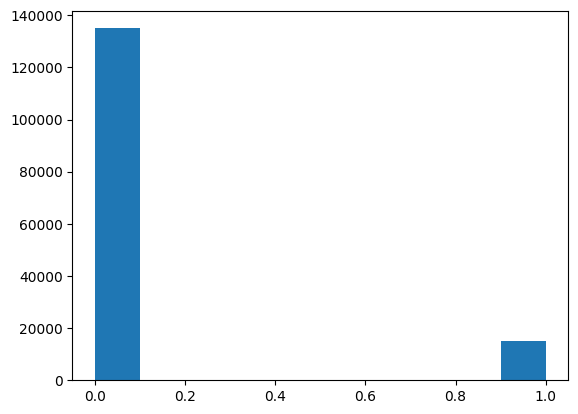

In [3]:
plt.hist(y_train)

In [4]:
print(f"y_train[:10]:{y_train[:10]}")
print(f"X_train[:10]:{X_train[:10]}")

print(f"y_test[:10]:{y_test[:10]}")
print(f"X_test[:10]:{X_test[:10]}")

y_train[:10]:[0 0 0 0 0 0 1 0 0 0]
X_train[:10]:[[ 0.06203223 -0.02035415  0.04720565 ...  0.04892744  0.08062909
  -0.06139995]
 [ 0.06069136 -0.05441829  0.05200146 ...  0.04928583  0.07663461
  -0.03135901]
 [ 0.03751005  0.00668358  0.06885264 ...  0.04504646  0.08882105
   0.02308337]
 ...
 [ 0.07920908 -0.01896831  0.0690019  ...  0.047296    0.0848454
  -0.07267927]
 [ 0.09422581 -0.03931188  0.06317996 ...  0.05948301  0.07974861
   0.00145433]
 [ 0.06127349 -0.01193873  0.04806825 ...  0.04803253  0.10128837
   0.00717351]]
y_test[:10]:[0 0 0 0 0 0 0 0 0 0]
X_test[:10]:[[ 0.06347092 -0.04583348  0.05790416 ...  0.06639768  0.1050477
   0.07043118]
 [ 0.0476456   0.01022432  0.04471841 ...  0.07420449  0.10699662
  -0.03754955]
 [ 0.06307717  0.00917369  0.06443876 ...  0.0453112   0.08873925
  -0.08076353]
 ...
 [ 0.0842884  -0.03321982  0.06715355 ...  0.06373734  0.09378246
   0.06639209]
 [ 0.047579   -0.01805144  0.05108297 ...  0.05993878  0.10227779
  -0.0098839 ]
 [ 0.0

In [5]:
class TransactionsDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx].astype(np.float32), self.y[idx].astype(np.float32)


dataset_train = TransactionsDataset(X_train, y_train)
dataset_test = TransactionsDataset(X_test, y_test)
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=BATCH_SIZE)
dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size=BATCH_SIZE)

In [6]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear_0 = torch.nn.Linear(200, 1024)
        self.batch_norm_0 = torch.nn.BatchNorm1d(1024)
        self.relu_0 = torch.nn.ReLU(1024)
        self.linear_1 = torch.nn.Linear(1024, 2048)
        self.batch_norm_1 = torch.nn.BatchNorm1d(2048)
        self.relu_1 = torch.nn.ReLU(2048)
        self.linear_2 = torch.nn.Linear(2048, 1024)
        self.batch_norm_2 = torch.nn.BatchNorm1d(1024)
        self.relu_2 = torch.nn.ReLU(1024)
        self.dr_2 = torch.nn.Dropout1d(0.2)
        self.linear_3 = torch.nn.Linear(1024, 512)
        self.batch_norm_3 = torch.nn.BatchNorm1d(512)
        self.relu_3 = torch.nn.ReLU(512)
        self.linear_4 = torch.nn.Linear(512, 256)
        self.batch_norm_4 = torch.nn.BatchNorm1d(256)
        self.relu_4 = torch.nn.ReLU(256)
        self.linear_5 = torch.nn.Linear(256, 128)
        self.batch_norm_5 = torch.nn.BatchNorm1d(128)
        self.relu_5 = torch.nn.ReLU(128)
        self.dr_5 = torch.nn.Dropout1d(0.2)
        self.linear_6 = torch.nn.Linear(128, 64)
        self.batch_norm_6 = torch.nn.BatchNorm1d(64)
        self.relu_6 = torch.nn.ReLU(64)
        self.linear_7 = torch.nn.Linear(64, 16)
        self.relu_7 = torch.nn.ReLU(16)
        self.batch_norm_7 = torch.nn.BatchNorm1d(16)
        self.linear_8 = torch.nn.Linear(16, 1)
        self.relu_8 = torch.nn.ReLU(1)

    def forward(self, x):
        x = self.linear_0(x)
        x = self.batch_norm_0(x)
        x = self.relu_0(x)
        x = self.linear_1(x)
        x = self.batch_norm_1(x)
        x = self.relu_1(x)
        x = self.linear_2(x)
        x = self.batch_norm_2(x)
        x = self.relu_2(x)
        x = self.dr_2(x)
        x = self.linear_3(x)
        x = self.batch_norm_3(x)
        x = self.relu_3(x)
        x = self.linear_4(x)
        x = self.batch_norm_4(x)
        x = self.relu_5(x)
        x = self.dr_5(x)
        x = self.linear_5(x)
        x = self.batch_norm_5(x)
        x = self.relu_6(x)
        x = self.linear_6(x)
        x = self.batch_norm_6(x)
        x = self.relu_7(x)
        x = self.linear_7(x)
        x = self.batch_norm_7(x)
        x = self.relu_8(x)
        x = self.linear_8(x)
        return x


model = Model()
model.to(device)
checkpoint = None
# we need to add some weight to the success values because the labels are very unbalanced
loss_fn = torch.nn.BCEWithLogitsLoss(pos_weight=torch.Tensor([17.0 / 18.0]))
loss_fn.to(device)
min_test_loss = None
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [7]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        X = X.to(device)
        y = y.to(device)
        pred = model(X)
        y = y.unsqueeze(1)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if batch % 1000 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"Train loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    return model, optimizer


def test_loop(
    dataloader, model, loss_fn, min_loss, checkpoint, threshold_fn=torch.round
):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    preds = []
    targets = []
    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)
            y = y.unsqueeze(1)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            pred = torch.sigmoid(pred)
            pred = threshold_fn(pred)
            correct += (pred == y).sum().item()
            preds.extend(pred.cpu().numpy())
            targets.extend(y.cpu().numpy())
    print(classification_report(targets, preds))

    test_loss /= num_batches
    if not min_loss:
        min_loss = test_loss
        checkpoint = model
    if test_loss < min_loss:
        min_loss = test_loss
        checkpoint = model
    correct /= size
    print(f"Checkpoint test loss: {min_loss:>7f}")
    print(
        f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n"
    )
    return min_loss, checkpoint

In [8]:
for i in range(EPOCHS):
    model, optimizer = train_loop(dataloader_train, model, loss_fn, optimizer)
    min_test_loss, checkpoint = test_loop(dataloader_test, model, loss_fn, min_test_loss, checkpoint)

Train loss: 0.869799  [   32/150000]
Train loss: 0.174904  [32032/150000]
Train loss: 0.460698  [64032/150000]
Train loss: 0.232777  [96032/150000]
Train loss: 0.390223  [128032/150000]
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     44895
         1.0       0.90      0.01      0.02      5105

    accuracy                           0.90     50000
   macro avg       0.90      0.50      0.48     50000
weighted avg       0.90      0.90      0.85     50000

Checkpoint test loss: 0.257013
Test Error: 
 Accuracy: 89.9%, Avg loss: 0.257013 

Train loss: 0.231210  [   32/150000]
Train loss: 0.226657  [32032/150000]
Train loss: 0.374860  [64032/150000]
Train loss: 0.159306  [96032/150000]
Train loss: 0.332697  [128032/150000]
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     44895
         1.0       0.93      0.01      0.02      5105

    accuracy                           0.90     50000


In [9]:
print(f"Final checkpoint model loss: {min_test_loss}")

Final checkpoint model loss: 0.2478995443281842


In [10]:
# Recall is less than ideal, but this dataset is fairly imbalanced toward 0 for the label.

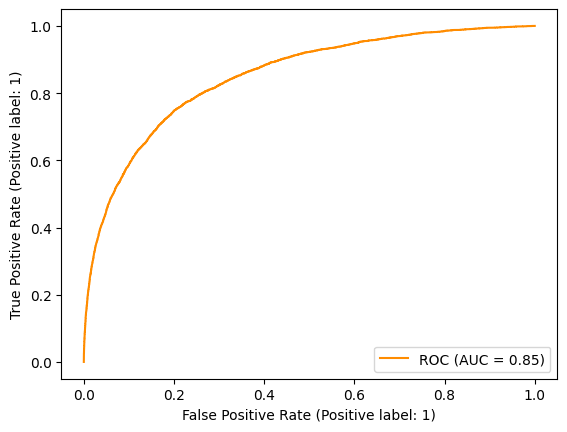

In [11]:
def get_roc_auc(dataloader_test, model):
    model.eval()
    preds = []
    targets = []
    with torch.no_grad():
        for X, y in dataloader_test:
            X = X.to(device)
            pred = model(X)
            pred = torch.sigmoid(pred)
            preds.extend(pred.cpu().numpy())
            targets.extend(y.cpu().numpy())
    RocCurveDisplay.from_predictions(
        targets,
        preds,
        name=f"ROC",
        color="darkorange",
    )
    auc = roc_auc_score(targets, preds)
    fps, tps, thresholds = roc_curve(targets, preds)
    return (auc, fps, tps, thresholds)


auc, fps, tps, thresholds = get_roc_auc(dataloader_test, model)

In [12]:
gmeans = np.sqrt(tps * (1 - fps))
i = np.argmax(gmeans)
print("Best Threshold=%f, G-Mean=%.3f" % (thresholds[i], gmeans[i]))

Best Threshold=0.078424, G-Mean=0.774


In [13]:
_, _ = test_loop(
    dataloader_test,
    model,
    loss_fn,
    min_test_loss,
    checkpoint,
    lambda x: (x > thresholds[i]).type(torch.int8),
)

              precision    recall  f1-score   support

         0.0       0.97      0.79      0.87     44895
         1.0       0.29      0.75      0.42      5105

    accuracy                           0.79     50000
   macro avg       0.63      0.77      0.65     50000
weighted avg       0.90      0.79      0.83     50000

Checkpoint test loss: 0.247900
Test Error: 
 Accuracy: 79.0%, Avg loss: 0.247900 



In [14]:
# Adjusting the threshold from round to manual, our recall has significantly increased but have lost precision.
# The real question here is what is actually important in terms of risk. 